# Лабораторная работа №1. EDA

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.core.pylabtools import figsize
from jinja2.lexer import describe_token

sns.set_palette("Set2")
pd.set_option('future.no_silent_downcasting', True)

In [3]:
data = pd.read_csv("data_sets/AirQualityUCI.csv", sep=";")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10.03.2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10.03.2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10.03.2004,20.00.00,"2,2",1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10.03.2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10.03.2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   CO(GT)         9357 non-null   object
 3   PT08.S1(CO)    9357 non-null   int64 
 4   NMHC(GT)       9357 non-null   int64 
 5   C6H6(GT)       9357 non-null   object
 6   PT08.S2(NMHC)  9357 non-null   int64 
 7   NOx(GT)        9357 non-null   int64 
 8   PT08.S3(NOx)   9357 non-null   int64 
 9   NO2(GT)        9357 non-null   int64 
 10  PT08.S4(NO2)   9357 non-null   int64 
 11  PT08.S5(O3)    9357 non-null   int64 
 12  T              9357 non-null   object
 13  RH             9357 non-null   object
 14  AH             9357 non-null   object
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### Датасет содержит следующие поля:
* Date - дата наблюдения

* Time - время наблюдения

* CO(GT) - среднечасовая концентрация CO в мг/м³

* PT08.S1(CO) - среднечасовые показания датчика (номинально целевой уровень CO)

* NMHC(GT) - среднечасовая концентрация неметаллических углеводородов в мкг/м³

* C6H6(GT) - среднечасовая концентрация бензола в мкг/м³

* PT08.S2(NMHC) - среднечасовые показания датчика (номинально целевое значение NMHC)

* NOx(GT) - среднечасовая концентрация NOx в ppb (по данным эталонного анализатора)

* PT08.S3(NOx) - среднечасовые показания датчика (номинально целевой уровень NOx)

* NO2(GT) - среднечасовая концентрация NO2 в мкг/м³ (по данным эталонного анализатора)

* PT08.S4(NO2) - среднечасовые показания датчика (номинально целевое значение NO2)

* PT08.S5(O3) - среднечасовые показания датчика (номинально целевой уровень O3)

* T - температура

* RH - относительная влажность

* AH - абсолютная влажность

In [7]:
float_convert_columns = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]
for column in float_convert_columns:
    data[column] = data[column].str.replace(',', '.')
    data[column] = data[column].astype(float)
data["Date"] = pd.to_datetime(data["Date"] + " " + data["Time"], format="%d.%m.%Y %H.%M.%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

Разобьем столбец с датой на отдельные столбцы с годом, месяцем, днем, днем недели и часом. Полный столбец `Date` после этого удалим.

In [8]:
data["year"] = data["Date"].dt.year
data["month"] = data["Date"].dt.month_name()
data["day"] = data["Date"].dt.day
data["day_of_week"] = data["Date"].dt.day_name()
data["hour"] = data["Date"].dt.hour

data = data.drop(["Date", "Time"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  year           9357 non-null   int32  
 14  month          9357 non-null   object 
 15  day            9357 non-null   int32  
 16  day_of_week    9357 non-null   object 
 17  hour           9357 non-null   int32  
dtypes: float

In [9]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,day,hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004.240141,15.876884,11.498557
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,0.427192,8.808653,6.923182
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004.000000,1.000000,0.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004.000000,8.000000,5.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004.000000,16.000000,11.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004.000000,23.000000,18.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000,31.000000,23.000000


Заметим, что во всех столбцах, характеризующих воздух, минимальное значение показателей составляет -200. Можно было бы предположить, что такое возможно из-за некорректной работы приборов, но значение -200 присутствует не только в показателях, которые фиксировались приборами, но и в тех столбцах, которые отображают фактический показатель. Ввиду того, что в датасете отсутствуют пропуски, возможно, что значения -200 использовали для заполнения пропусков. Проанализируем данные, в которых нет значений -200 среди показателей.

In [10]:
numeric_columns = data.select_dtypes(include="number").columns
data[(data[numeric_columns] > -200).all(axis=1)].describe()
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,day_of_week,hour
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004,March,10,Wednesday,18
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004,March,10,Wednesday,19
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004,March,10,Wednesday,20
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004,March,10,Wednesday,21
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004,March,10,Wednesday,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,2005,April,4,Monday,10
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,2005,April,4,Monday,11
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,2005,April,4,Monday,12
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,2005,April,4,Monday,13


Заметим, что среди отфильтрованных данных все столбцы, характеризующие химический состав воздуха, принимают положительные значения. Значит, значение -200 использовалось для заполнения пропусков в данных. Заполним пропуски.

In [11]:
(data == -200).sum() / data.shape[0] * 100

CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
year              0.000000
month             0.000000
day               0.000000
day_of_week       0.000000
hour              0.000000
dtype: float64

Так как 90% значений столбца `NMHC(GT)` - пропуски, то этот столбец стоит удалить.

Так как пропуски есть только в числовых столбцах, соответствующих непрерывным переменным, то заполним пропуски медианным значением.



In [12]:
data = data.drop("NMHC(GT)", axis=1)
numeric_columns = numeric_columns.drop("NMHC(GT)")
for column in numeric_columns:
    data[column] = data[column].replace(-200, data[column].median())
(data == -200).sum() / data.shape[0] * 100

CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
year             0.0
month            0.0
day              0.0
day_of_week      0.0
hour             0.0
dtype: float64

## Статистический анализ данных

In [13]:
data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,day,hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.035343,1098.001282,9.997713,937.426312,228.347547,833.870578,110.092017,1455.863097,1019.741477,18.274105,49.209394,1.023624,2004.240141,15.876884,11.498557
std,1.339737,212.985308,7.314906,261.700283,197.570902,251.872460,44.399549,339.373394,390.927152,8.660352,16.975247,0.395948,0.427192,8.808653,6.923182
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004.000000,1.000000,0.000000
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100,2004.000000,8.000000,5.000000
50%,1.500000,1053.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004.000000,16.000000,11.000000
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004.000000,23.000000,18.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000,31.000000,23.000000


`CO(GT)`

Среднее значение - 2, медианное значение - 1.5, минимальное значение - 0.1, максимальное - 11.9.

Из-за небольшой разницы между средним и медианным значением содержимого угарного газа в воздухе можно сказать, что большую часть времени уровень его содержимого в воздухе безопасен.
При этом возможны пики до 12, что говорит о том, что иногда фиксируется высокий уровень загрязнения.

`PT08.S1(CO)`

Среднее значение - 1098, медианное значение - 1053, минимальное значение - 647, максимальное - 2020.
Значения датчика соответствуют значениям содержимого угарного газа в воздухе: большая часть показаний датчика соответствует безопасному уровню содержимого угарного газа в воздухе, но при этом иногда фиксируется высокий уровень показаний.

`C6H6(GT)`

Среднее значение - 9.9, медианное значение - 7.9, минимальное значение - 0.1, максимальное - 63.7.
В среднем значения концентрации бензола в воздухе превышают значения безопасного уровня, но при этом такие превышения типичны для городской среды. Меньше, чем 25% значений соответствуют безопасному уровню бензола в 5 мкг/м3. Фиксируются также и особо крупные случаи содержимого бензола в воздухе - 63.7 мгк/м3.

`PT08.S2(NMHC)`

Среднее значение - 937.4, медианное значение - 895, минимальное значение - 383, максимальное - 2214.
Значения датчика соответствуют значениям содержимого бензола в воздухе: большая часть показаний датчика соответствует превышению допустимого уровня бензола, фиксируются особо опасные случаи с большим уровнем содержимого бензола в воздухе - 2214.

`NOx(GT)`

Среднее значение - 228.3, медианное значение - 141, минимальное значение - 2, максимальное - 1479.
Большая часть значений соответствует повышенному значению концентрации оксидов азота, что говорит о повышенном уровне загрязнения воздуха в среднем.
При этом есть данные с низкими показателями концентрации - они соответствуют более чистому воздуху.
Кроме того, есть данные с особо крупными показателями - они говорят о высоком уровне загрязнения воздуха.

`PT08.S4(NOx)`

Среднее значение - 833.87, медианное значение - 794, минимальное значение - 322, максимальное - 2683.

Значения датчика соответствуют значениям содержимого оксидов азота в воздухе: большая часть показаний датчика соответствует превышению допустимого уровня оксидов азота, фиксируются особо опасные случаи с большим уровнем содержимого бензола в воздухе. При этом для показаний датчика характерна большая асимметрия.


`NO2(GT)`

Среднее значение - 110, медианное значение - 96, минимальное значение - 2, максимальное - 340.

Средние значения показателя диоксида азота превышают безопасный уровень его содержания в воздухе. При этом есть данные и о безопасном уровне содержания, и особо опасном. Но они редки.


`PT08.S4(NO2)`

Среднее значение - 1455.8, медианное значение - 1446, минимальное значение - 551, максимальное - 2775.

Показания датчика соответствуют реальным показателям содержания диоксида азота в воздухе и типичны для городской среды.

`PT08S5(O3)`

Среднее значение - 1019.7, медианное значение - 942, минимальное значение - 221, максимальное - 2523.

Средние значения датчика соответствуют умеренному фону. При этом есть данные и об очень чистом воздухе с низким содержанием озона, и о крайне загрязненном воздухе с высоким содержанием озона.

`T`

Среднее значение - 18.2, медианное значение - 17.2, минимальное значение - -1.9, максимальное - 44.6.
Для местности характерен теплый климат.

`RH`

Среднее значение - 49.2, медианное значение - 48.6, минимальное значение - 9.2, максимальное - 88.7.

Для местности характерен низкий уровень влажности и сухой климат.

`AH`

Среднее значение - 1, медианное значение - 0.97, минимальное значение - 0.1, максимальное - 2.2.

Так как значение влажности в основном низкое, то показатели абсолютной влажности тоже низкие.


`year`

Минимальное значение - 2004, максимальное - 2005.

Измерения происходили с 2004 до 2005 годы.

`day`

Среднее значение - 15.8, медианное значение - 16, минимальное значение - 1, максимальное - 31.

Измерения могли происходить в любой день месяца.

`hour`

Среднее значение - 11.4, медианное значение - 11, минимальное значение - 0, максимальное - 23.

Измерения могли происходить в любое время суток.

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>,
        <Axes: title={'center': 'PT08.S2(NMHC)'}>],
       [<Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>],
       [<Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

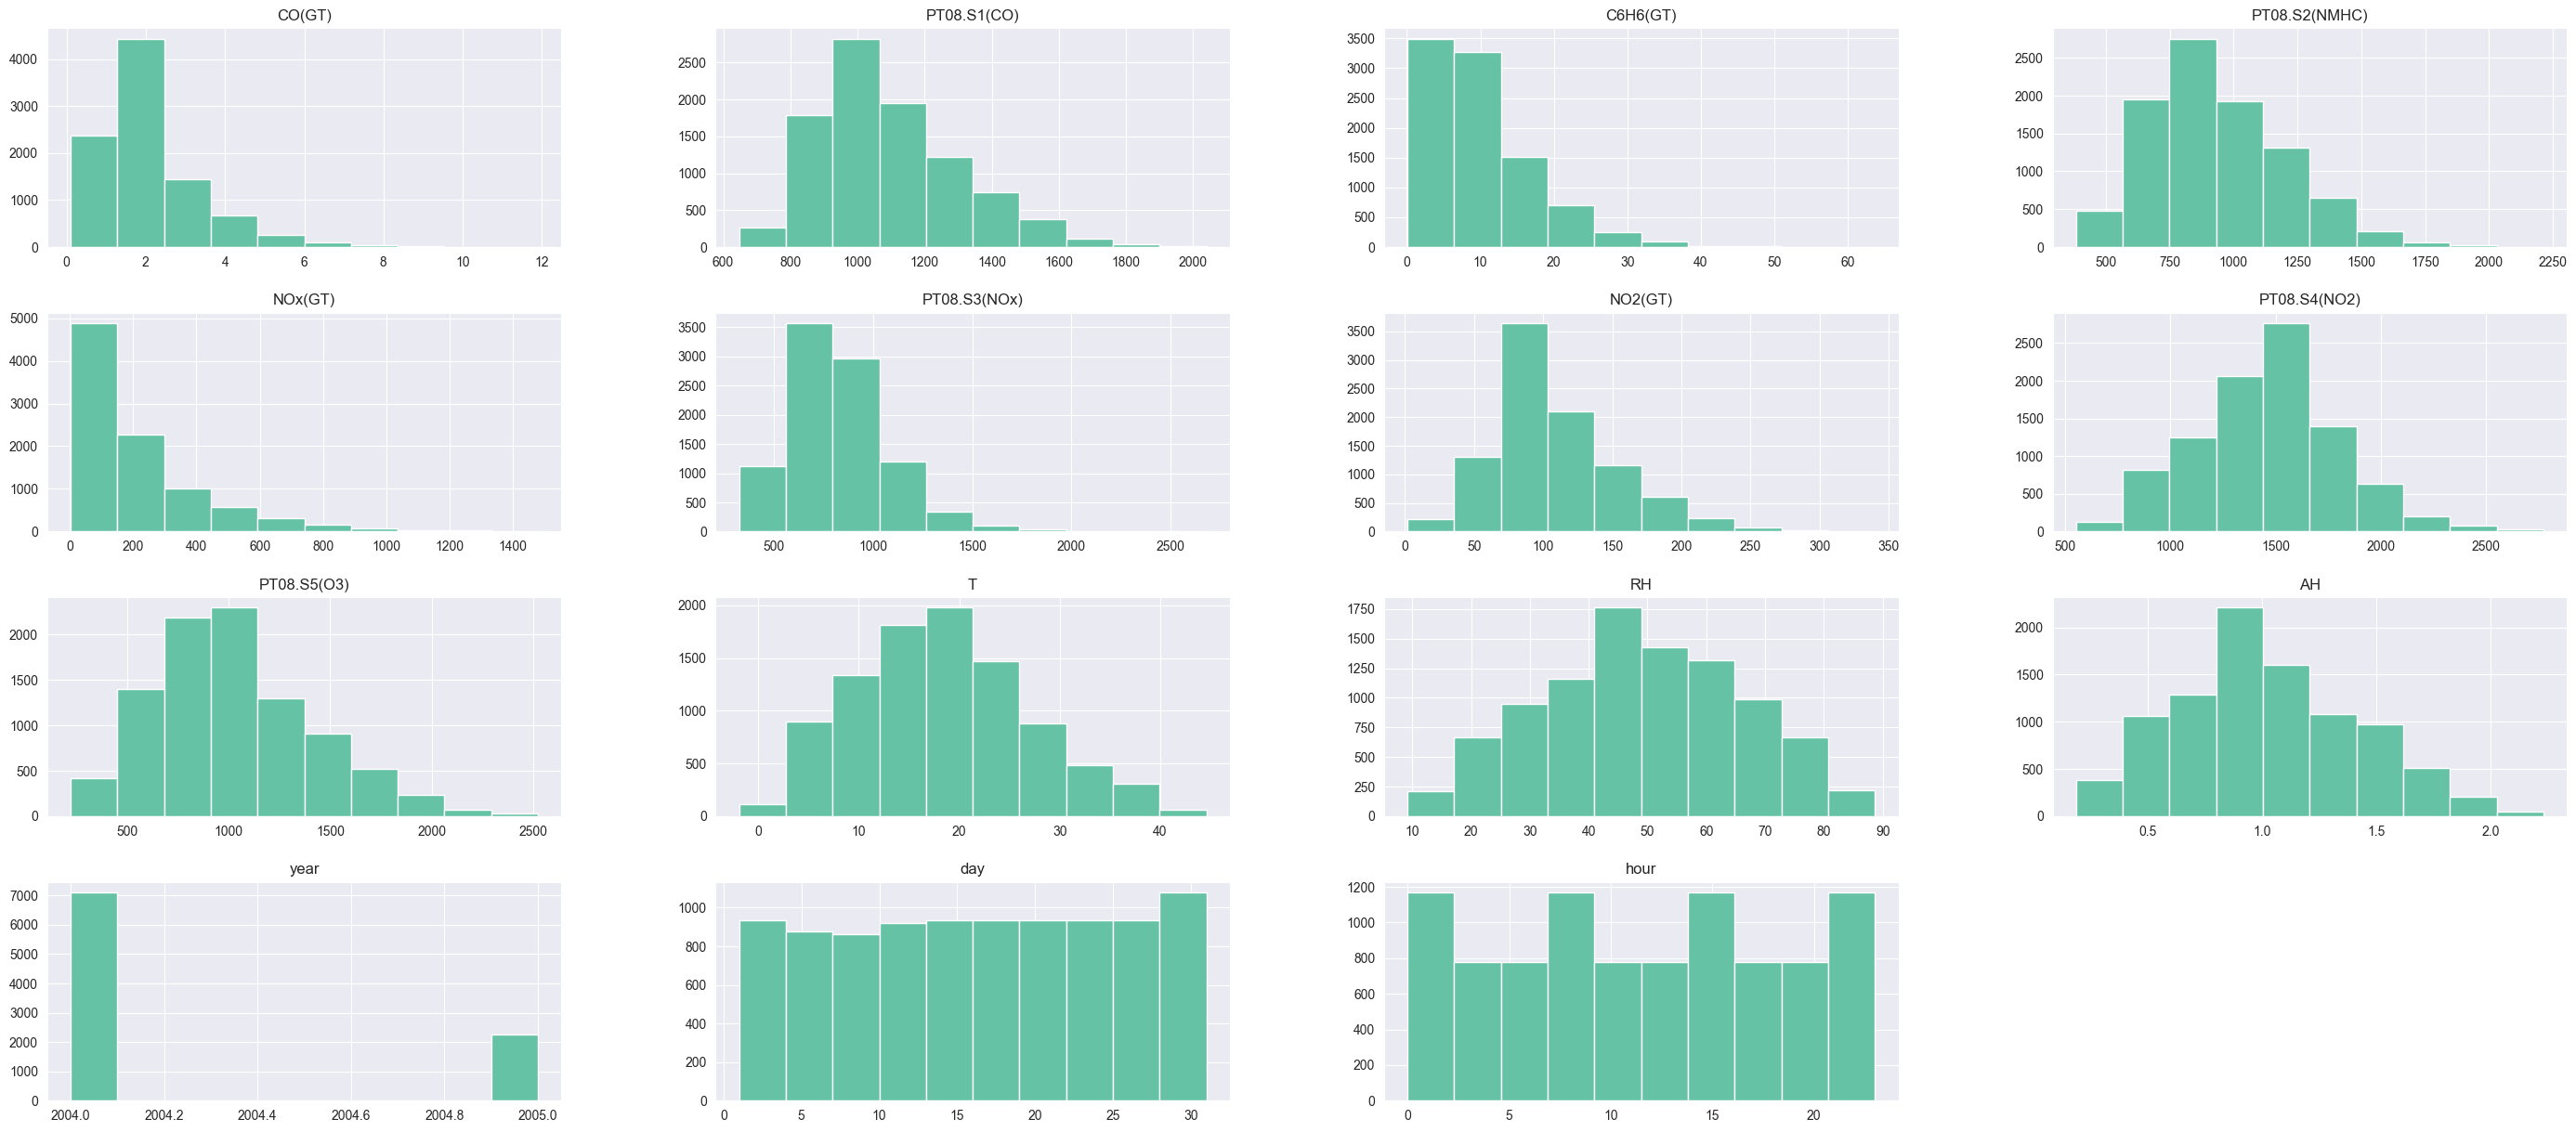

In [14]:
data.hist(figsize=(35, 15))

<Axes: >

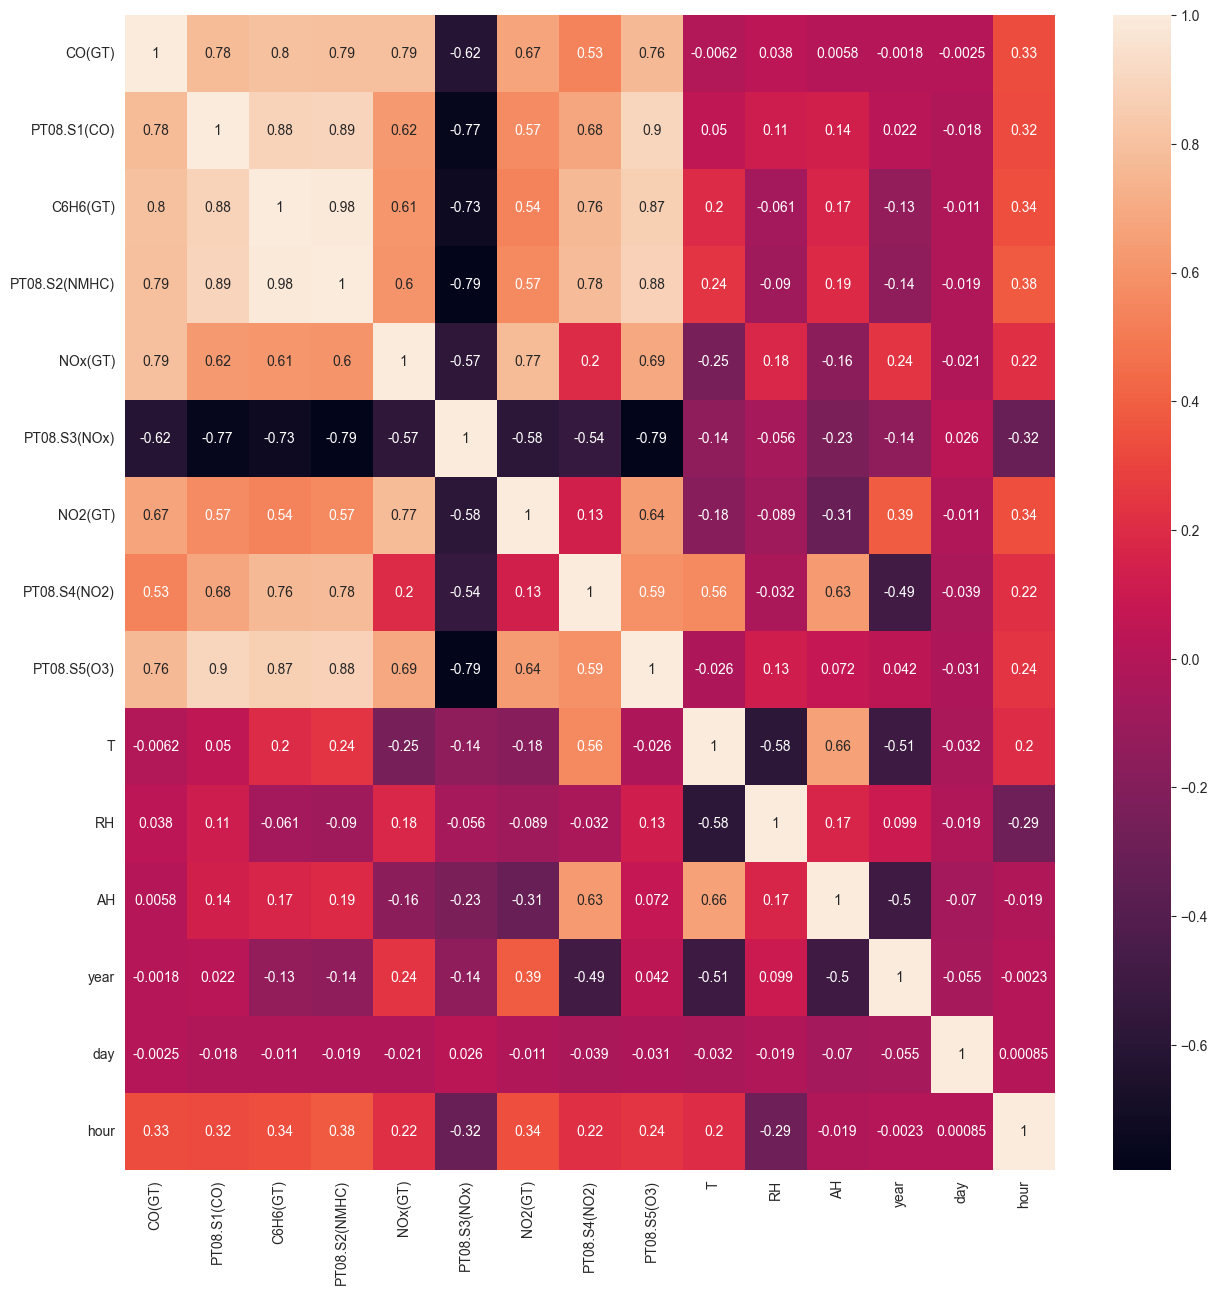

In [15]:

plt.figure(figsize=(15, 15))
sns.heatmap(data[numeric_columns].corr(), annot=True)

Text(0, 0.5, '')

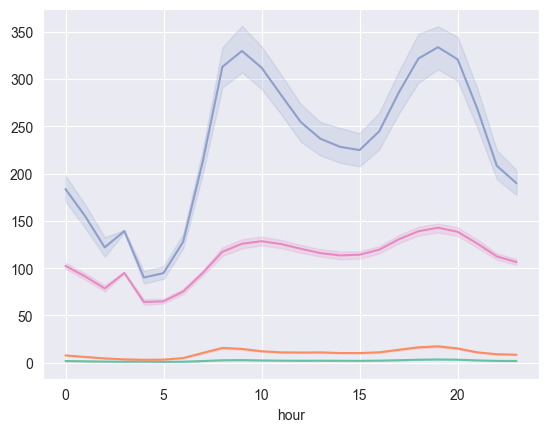

In [48]:
gt_columns = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)"]
for column in gt_columns:
    sns.lineplot(data, x="hour", y=column, markers=True)

plt.ylabel("")

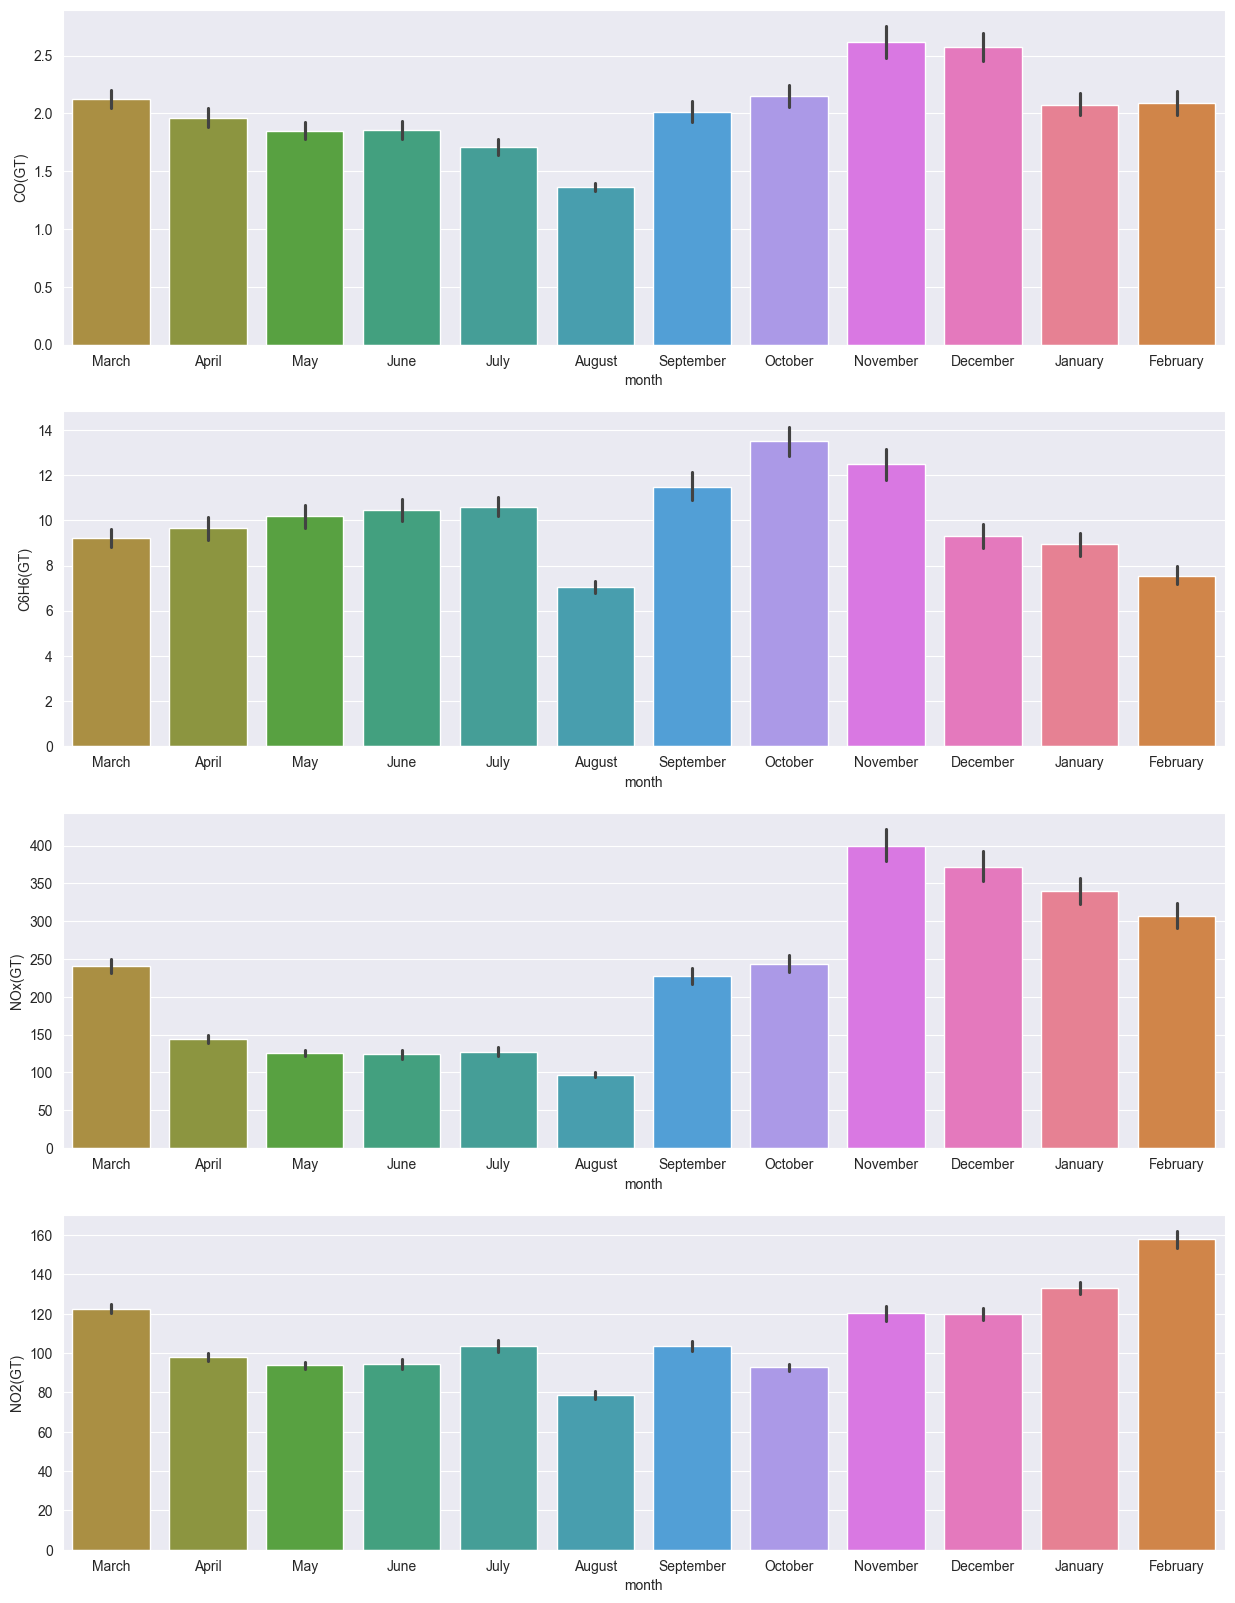

In [55]:
months_order = ["January","February","March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(len(gt_columns), 1, figsize = (15, 20))
for i in range(len(gt_columns)):
    sns.barplot(data, y=gt_columns[i], x="month", hue="month", hue_order=months_order, ax=ax[i])


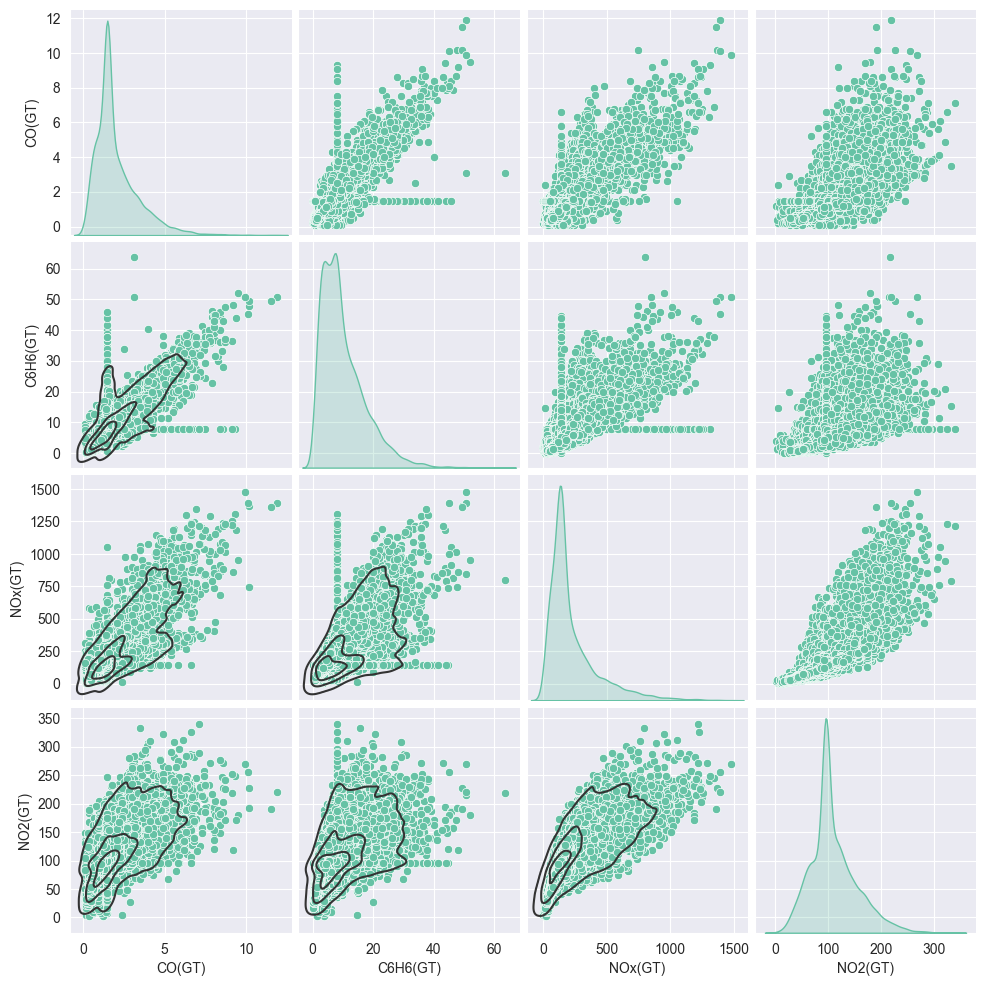

In [60]:
g = sns.pairplot(data[gt_columns], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")